<a href="https://colab.research.google.com/github/LucasFDutra/machine_learning_studies/blob/master/machine_learning_studies/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1MB 9.8MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=5180b8c1fa0522a2001ac0319834b4da415fffae0b4d4870e959455aa5b04a20
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [8]:
train_images.shape

(60000, 28, 28, 1)

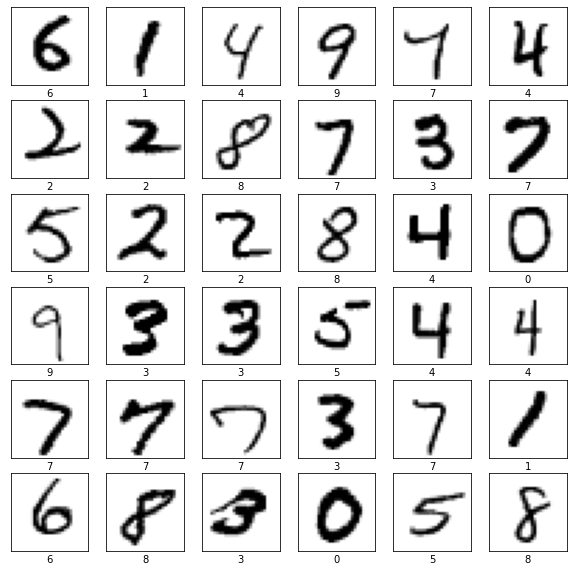

In [12]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

# Construindo uma rede neural simples

In [16]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return fc_model

model = build_fc_model()

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
BATCH_SIZE = 64
EPOCHS = 5


model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3681 - accuracy: 0.8972
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1959 - accuracy: 0.9439
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1482 - accuracy: 0.9578
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1195 - accuracy: 0.9659
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1013 - accuracy: 0.9713


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9701


0.9700999855995178

# Construindo a rede convolucional

In [23]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(900, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
print(cnn_model.predict(train_images[[0]]))
print(cnn_model.summary())

[[0.09305394 0.11219725 0.09680604 0.11248752 0.09830402 0.10024347
  0.09560692 0.09463245 0.09892504 0.09774326]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 900)               810900    
____

In [24]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [25]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1539 - accuracy: 0.9532
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0306 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0173 - accuracy: 0.9946


In [26]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9898


0.989799976348877

In [27]:
predictions = cnn_model.predict(test_images)

In [28]:
predictions[0]

array([1.2806657e-10, 2.0483823e-08, 5.1633041e-08, 1.2648931e-05,
       2.3510321e-08, 4.2348960e-09, 1.5409190e-11, 9.9998677e-01,
       2.8595610e-09, 4.6607587e-07], dtype=float32)

In [29]:
prediction = np.argmax(predictions[0])
prediction

7

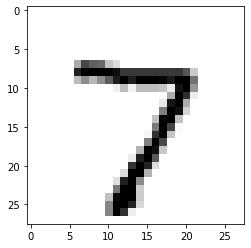

In [30]:
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

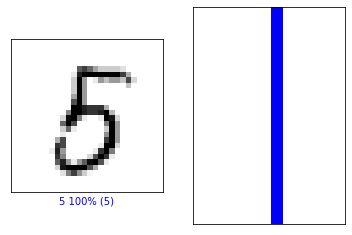

In [32]:
image_index = 45 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

## Treinando utilizando o GradientTape

In [35]:
cnn_model = build_cnn_model()
batch_size = 12
history = []
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

for idx in range(0, train_images.shape[0], batch_size):
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    with tf.GradientTape() as tape:
        logits = cnn_model(images)
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    
    history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

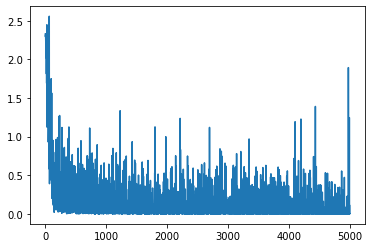

In [36]:
plt.plot(history)